<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/Image_Classification_using_CNN_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are asked to train a model with following steps:
1. Download, extract and load CIFAR10 image dataset using torchvision ==done==
2. Show random batches of images in a grid using torchvision.utils.make_grid ==done==
3. Create a convolutional neural network using with nn.Conv2d and nn.MaxPool2d layers ==done==
4. Train a convolutional neural network and visualize the losses and errors ==done==
5. Understand overfitting and the strategies for avoiding it ===done==
6. Generate predictions on single images from the test set ===done==
7. Save and load model for further purposes ==done==


In [1]:
import torch #for using tensors
import torch.nn as nn # creating neural network
import torch.nn.functional as F # recallable functions like relu,sigmoid and etc.
import torchvision # subpackage for vision models
import torchvision.transforms as transforms # image augmentation
import torch.optim as optim # optimisation functions like sgd, adam
from torch.utils.data import DataLoader # creating a data loader
from torchvision.transforms import ToTensor # converting image to tensor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 20

In [30]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
test_images, test_labels = next(iter(testloader))
test_images.shape

torch.Size([4, 3, 32, 32])

In [5]:
train_images, train_labels = next(iter(trainloader))
train_images.shape

torch.Size([4, 3, 32, 32])

In [6]:
def imshow(img):
    img = img / 2 + 0.5    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [13]:
datater = iter(testloader)
images, labels = next(datater)

In [7]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

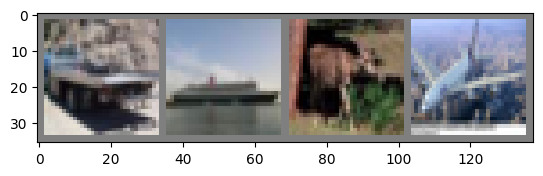

truck ship  deer  plane


In [8]:
imshow(torchvision.utils.make_grid(images))
for i in range(0, batch_size, 10):
    print(' '.join(f'{classes[labels[j]]:5s}' for j in range(i, min(i + 10, batch_size))))

#Modelling

In [9]:
class NeuralNet(nn.Module):
    def __init__(self):
         super().__init__()
         self.conv1 = nn.Conv2d(3,12,5) # (12, 28, 28)
         self.pool = nn.MaxPool2d(2,2) # (12,14,14)
         self.conv2 = nn.Conv2d(12,24,5) #(24,10,10) -> (24,5,5) ->flatten 24*5*5
         self.fc1 = nn.Linear(24*5*5, 120)
         self.fc2 = nn.Linear(120, 84)
         self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#Loss function and optimizer

In [10]:
criterion = nn.CrossEntropyLoss()
net = NeuralNet()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

In [11]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.299
[1,  6000] loss: 2.294
[1,  8000] loss: 2.285
[1, 10000] loss: 2.251
[1, 12000] loss: 2.139
[2,  2000] loss: 2.020
[2,  4000] loss: 1.962
[2,  6000] loss: 1.919
[2,  8000] loss: 1.867
[2, 10000] loss: 1.806
[2, 12000] loss: 1.745
Finished Training


In [12]:
for epoch in range(30):
    print(f'Training epoch {epoch}...')

    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)  # Total training
        correct_train += (predicted == labels).sum().item()  # correct prediction

    print(f'Loss: {running_loss/ len(trainloader) : .4f}')

training_accuracy = 100 * correct_train / total_train
print(f'Training Accuracy: {training_accuracy:.2f}%')

print("Training complete!")

Training epoch 0...
Loss:  1.6203
Training epoch 1...
Loss:  1.4913
Training epoch 2...
Loss:  1.3979
Training epoch 3...
Loss:  1.3130
Training epoch 4...
Loss:  1.2394
Training epoch 5...
Loss:  1.1773
Training epoch 6...
Loss:  1.1238
Training epoch 7...
Loss:  1.0758
Training epoch 8...
Loss:  1.0344
Training epoch 9...
Loss:  0.9975
Training epoch 10...
Loss:  0.9631
Training epoch 11...
Loss:  0.9306
Training epoch 12...
Loss:  0.9029
Training epoch 13...
Loss:  0.8737
Training epoch 14...
Loss:  0.8487
Training epoch 15...
Loss:  0.8243
Training epoch 16...
Loss:  0.7948
Training epoch 17...
Loss:  0.7719
Training epoch 18...
Loss:  0.7492
Training epoch 19...
Loss:  0.7231
Training epoch 20...
Loss:  0.7037
Training epoch 21...
Loss:  0.6814
Training epoch 22...
Loss:  0.6587
Training epoch 23...
Loss:  0.6385
Training epoch 24...
Loss:  0.6192
Training epoch 25...
Loss:  0.5976
Training epoch 26...
Loss:  0.5778
Training epoch 27...
Loss:  0.5604
Training epoch 28...
Loss:  0.

In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 68 %


#prediction the model

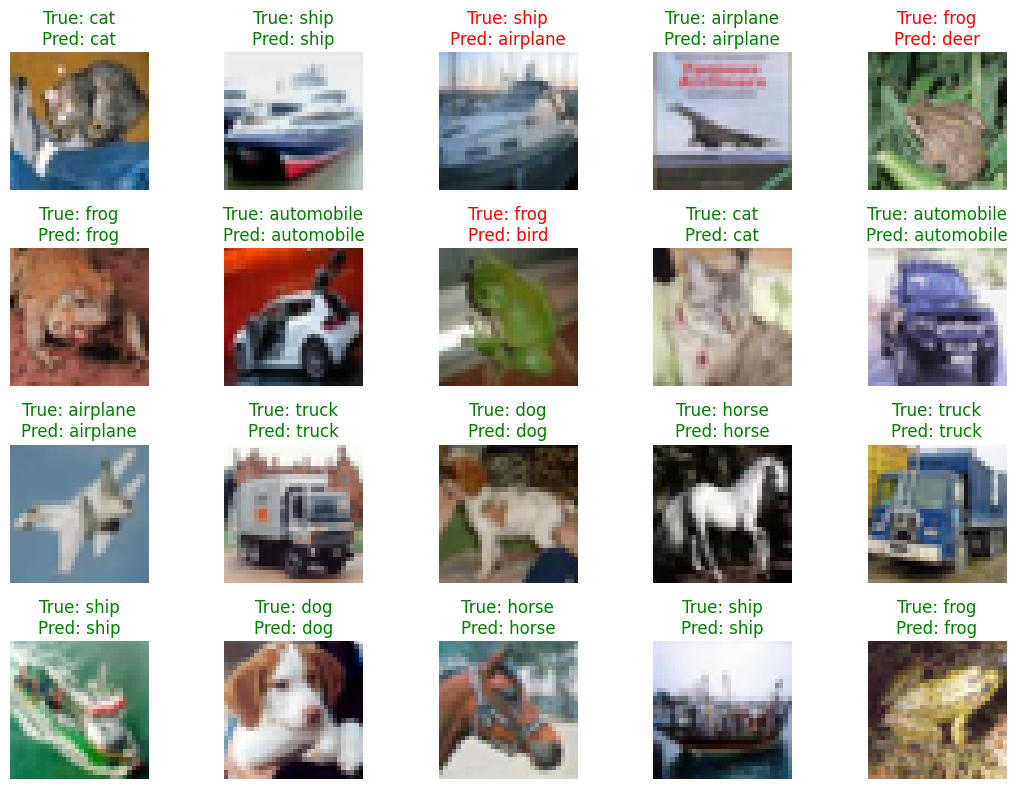

In [38]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


num_images = 20
dataiter = iter(testloader)
images, labels = next(dataiter)


images_list = []
labels_list = []


for i, (images, labels) in enumerate(testloader):
    images_list.append(images)
    labels_list.append(labels)
    if len(torch.cat(images_list)) >= 20:
        break

images = torch.cat(images_list)[:20]
labels = torch.cat(labels_list)[:20]




net.eval()
with torch.no_grad():
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)



plt.figure(figsize=(11, 8))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    img = images[i] / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    true_label = class_names[labels[i].item()]
    pred_label = class_names[predicted[i].item()]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


#model save

In [44]:
import torch

torch.save(net, 'model.pth')